In [29]:
#Step 1 – Load Dataset & Show Interactive Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from google.colab import data_table
data_table.enable_dataframe_formatter()

# Load dataset
df = pd.read_excel("Hybrid_Resume_Dataset.xlsx")

print("Dataset Loaded Successfully")
print("Dataset Shape:", df.shape)

df.head()



Dataset Loaded Successfully
Dataset Shape: (100, 2)


,resume_text,category
0,"Experienced in Statistics , Data Visualization...",Data Science
1,"Experienced in Cyber Threat Analysis , Firewal...",Cyber Security
2,"Experienced in JUnit , Regression Testing , QA...",Testing
3,"Experienced in Kubernetes , CI/CD , DevOps , A...",Cloud Computing
4,"Experienced in Bug Tracking , Agile Testing , ...",Testing


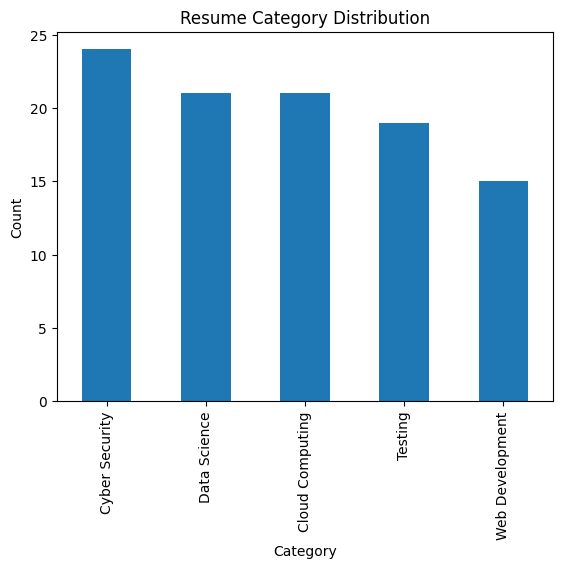

In [30]:
#STEP 2 – Basic Statistical Analysis
plt.figure()
df['category'].value_counts().plot(kind='bar')
plt.title("Resume Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [31]:
#STEP 3 – Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['resume_text'].apply(preprocess)

print("Preprocessing Completed")
df.head()



Preprocessing Completed


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,resume_text,category,clean_text
0,"Experienced in Statistics , Data Visualization...",Data Science,experienced statistics data visualization deep...
1,"Experienced in Cyber Threat Analysis , Firewal...",Cyber Security,experienced cyber threat analysis firewall pen...
2,"Experienced in JUnit , Regression Testing , QA...",Testing,experienced junit regression testing qa agile ...
3,"Experienced in Kubernetes , CI/CD , DevOps , A...",Cloud Computing,experienced kubernetes ci cd devops aws strong...
4,"Experienced in Bug Tracking , Agile Testing , ...",Testing,experienced bug tracking agile testing manual ...


TF-IDF Matrix Shape: (100, 71)


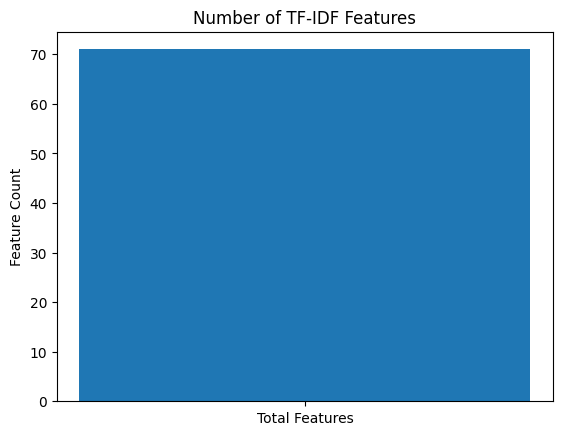

In [32]:
#STEP 4 – Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

print("TF-IDF Matrix Shape:", X.shape)

plt.figure()
plt.bar(["Total Features"], [X.shape[1]])
plt.title("Number of TF-IDF Features")
plt.ylabel("Feature Count")
plt.show()

In [33]:
#STEP 5 – Encode Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label Mapping:")
for i, label in enumerate(le.classes_):
    print(label, "->", i)


Label Mapping:
Cloud Computing -> 0
Cyber Security -> 1
Data Science -> 2
Testing -> 3
Web Development -> 4


In [34]:
#STEP 6 – Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (80, 71)
Testing Data Shape: (20, 71)


In [35]:
#STEP 7 – Supervised Learning (Logistic Regression)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Logistic Regression Model Trained")



Logistic Regression Model Trained



--- Logistic Regression Results ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


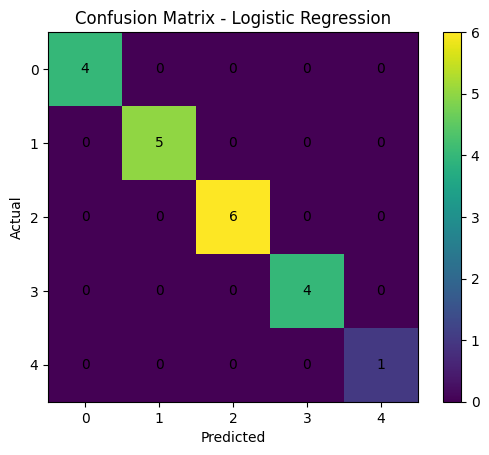

In [36]:
#STEP 8 – Statistical Evaluation + Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


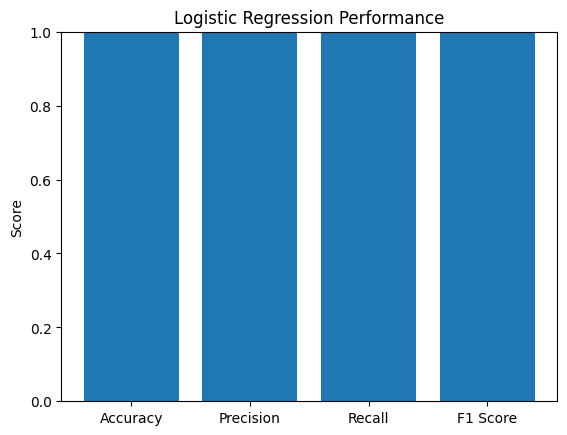

In [37]:
#STEP 9 – Performance Bar Chart
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy, precision, recall, f1]

plt.figure()
plt.bar(metrics, values)
plt.title("Logistic Regression Performance")
plt.ylim(0,1)
plt.ylabel("Score")
plt.show()


Training Neural Network...
Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1602 - loss: 1.6024
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5594 - loss: 1.5523
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8352 - loss: 1.5009
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9719 - loss: 1.4494
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9797 - loss: 1.3967
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9898 - loss: 1.3426
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9937 - loss: 1.2709
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9898 - loss: 1.1927 
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 1.1148
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.0231 
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.9185
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accu

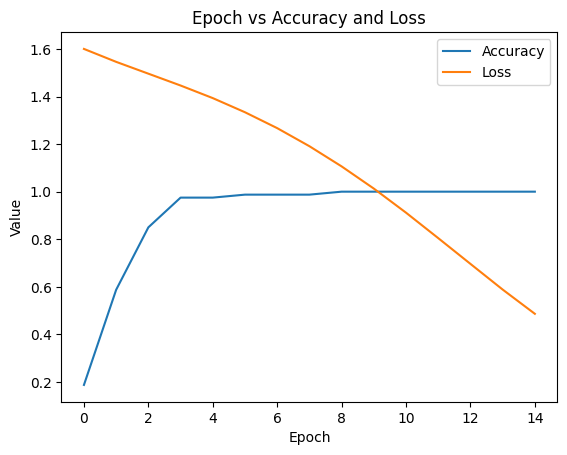

In [39]:
#STEP 10 – Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_dim=X_train_dense.shape[1]))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(len(set(y_encoded)), activation='softmax'))

nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Training Neural Network...")
history = nn_model.fit(X_train_dense, y_train, epochs=15, verbose=1)
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Epoch vs Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend(["Accuracy", "Loss"])
plt.show()

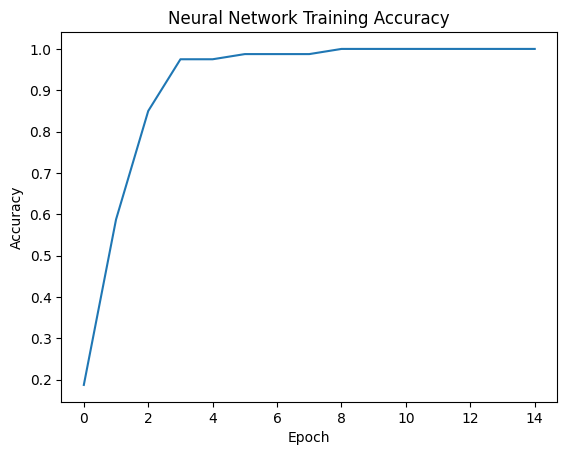

In [40]:
#STEP 11 – Neural Network Accuracy Graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.title("Neural Network Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


PCA Shape: (100, 2)


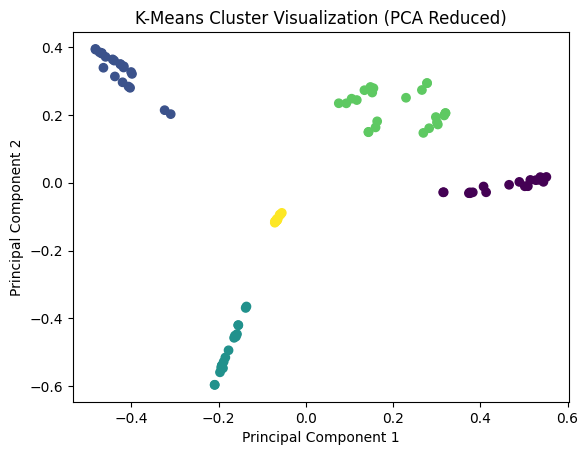

In [44]:
#STEP 12 – K-Means Clustering
from sklearn.decomposition import PCA

# Convert sparse matrix to dense
X_dense = X.toarray()

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

print("PCA Shape:", X_pca.shape)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['Cluster'] = clusters
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

plt.title("K-Means Cluster Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


In [48]:
domain_skills = {
    "Data Science": ["python", "machine learning", "deep learning", "statistics", "pandas", "numpy"],
    "Web Development": ["html", "css", "javascript", "react", "node"],
    "Testing": ["selenium", "manual testing", "automation", "bug", "qa"],
    "Cloud Computing": ["aws", "azure", "docker", "kubernetes", "devops"],
    "Cyber Security": ["network security", "ethical hacking", "cryptography", "firewall"]
}


In [57]:
def generate_ai_report(resume_text):

    cleaned = preprocess(resume_text)

    # Predict role
    vectorized = vectorizer.transform([cleaned])
    prediction = lr_model.predict(vectorized)
    predicted_category = le.inverse_transform(prediction)[0]

    required_skills = domain_skills[predicted_category]

    matched_skills = []
    missing_skills = []

    cleaned_words = cleaned.lower().split()

    # Robust word-based matching
    for skill in required_skills:
        skill_words = skill.lower().split()

        if all(word in cleaned_words for word in skill_words):
            matched_skills.append(skill)
        else:
            missing_skills.append(skill)

    strength_score = (len(matched_skills) / len(required_skills)) * 100

    print("\n")
    print("        AI Resume Report       ")
    print("")
    print(f"Predicted Role: {predicted_category}")
    print(f"Resume Strength Score: {strength_score:.2f}%")

    print("\n Matched Skills:")
    if matched_skills:
        for skill in matched_skills:
            print(" -", skill)
    else:
        print(" None")

    print("\n Missing Skills:")
    if missing_skills:
        for skill in missing_skills:
            print(" -", skill)
    else:
        print(" None")

    if strength_score < 50:
        recommendation = "Add more domain-specific projects and certifications."
    elif strength_score < 80:
        recommendation = "Improve advanced technical depth."
    else:
        recommendation = "Strong profile. Focus on leadership and measurable achievements."

    print("\nRecommendation:")
    print(recommendation)
    print("")
user_resume = input("Enter your resume text: ")
generate_ai_report(user_resume)


Enter your resume text: python machine learning deep learning statistics pandas numpy


        AI Resume Report       

Predicted Role: Data Science
Resume Strength Score: 100.00%

✔ Matched Skills:
 - python
 - machine learning
 - deep learning
 - statistics
 - pandas
 - numpy

 Missing Skills:
 None

Recommendation:
Strong profile. Focus on leadership and measurable achievements.



In [60]:
print("\n AI Resume Analyzer \n")

user_resume = input("Enter your resume text:\n")

generate_ai_report(user_resume)



 AI Resume Analyzer 

Enter your resume text:
python machine learning deep learning statistics pandas numpy


        AI Resume Report       

Predicted Role: Data Science
Resume Strength Score: 100.00%

✔ Matched Skills:
 - python
 - machine learning
 - deep learning
 - statistics
 - pandas
 - numpy

 Missing Skills:
 None

Recommendation:
Strong profile. Focus on leadership and measurable achievements.

